## Chi-Square Test
#### Objectives
You will be able to:

- Identify use cases for the chi-square test
- Distinguish between chi-square tests for goodness of fit, independence, and homogeneity
- Perform a chi-square test and make conclusions about an experiment based on the results

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

### Comparing t-tests and Chi-Square Tests
We'll introduce the chi-square test by comparing and contrasting it with a familiar statistical test: the t-test!

#### t-test Refresher
The t-test is applicable for continuous variables that can be represented by a probability density function (PDF), which allows us to understand the data in terms of parameters such as the mean and variance. There are several different kinds of t-tests depending on the question being asked, although we have mainly focused on one-sample and two-sample (independent) tests.

For example, we might do a one-sample, two-tailed t-test if we have the following (made up) sample of data, and we are trying to determine whether the mean of this data is significantly different from a 
μ
0
 of 21.

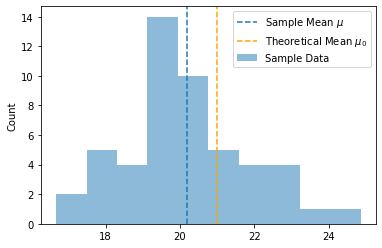

In [2]:
# Generate sample data as a normal continuous random variable
sample_data = stats.norm.rvs(loc=20, scale=2, size=50, random_state=5)

# Plot data as well as theoretical mean of 21
fig, ax = plt.subplots()
ax.hist(sample_data, alpha=0.5, label="Sample Data")
ax.axvline(sample_data.mean(), linestyle="--", label=r"Sample Mean $\mu$")
ax.axvline(21, linestyle="--", color="orange", label=r"Theoretical Mean $\mu_{0}$")
ax.set_ylabel("Count")
ax.legend();

In [3]:
stats.ttest_1samp(sample_data, 21)

Ttest_1sampResult(statistic=-3.335711380689097, pvalue=0.001628519936938842)

Based on the results above (two-sided, since our alternative hypothesis) we can reject the null hypothesis at an alpha of 0.01, since the resulting p-value (0.0016) is less than our alpha. Therefore we can say that the difference between the sample mean and 21 is statistically significant at the 0.01 significance level.

### Chi-Square Test Introduction
The chi-square $(X^2)$ test is applicable for discrete variables that can be represented by a probability mass function, which allows us to understand the data in terms of the frequencies of each outcome. There are several different kinds of chi-square tests depending on the question being asked, but we'll focus on Pearson's chi-square test and how it is applied for goodness of fit, independence, and homogeneity.

Let's start with a goodness of fit example. This is kind of like the one-sample t-test shown above, in that we are comparing sample data to a theoretical value. This time instead of comparing the sample mean to a theoretical mean, we will compare the frequencies of observed data to the expected frequencies.

Fair Coin?
For this example, let's use the coin toss at the Super Bowl (data through Super Bowl 55). We expect that this is a "fair" coin, meaning that we would expect it to produce Heads and Tails equally often.

In [5]:
# Data from sportsbettingdime.com
sb_data = pd.read_csv("D:\Programming\Datasets\superbowl.csv")
sb_data.tail()

,Super Bowl,Coin Toss Outcome,Coin Toss Winner,Game Winner
50,51,Tails,Home Team,Away Team
51,52,Heads,Home Team,Away Team
52,53,Tails,Home Team,Away Team
53,54,Tails,Away Team,Home Team
54,55,Heads,Away Team,Home Team


In [8]:
#coin toss count
coin_toss_counts = sb_data["Coin Toss Outcome"].value_counts().sort_index()
coin_toss_counts


Heads    26
Tails    29
Name: Coin Toss Outcome, dtype: int64

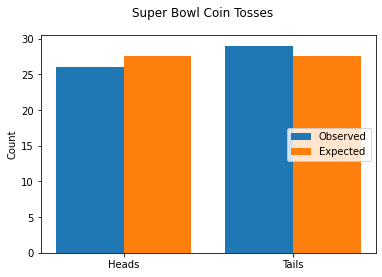

In [9]:
fig, ax = plt.subplots()

# Extract observed counts
fair_coin_observed = coin_toss_counts.values
# Heads and tails each expected half the time
fair_coin_expected = [sum(coin_toss_counts)/2, sum(coin_toss_counts)/2]

# Placeholder data for display purposes; you can ignore these values
x = np.array([0, 5])
offset = 1
bar_width = 2

# Plot bars
ax.bar(x-offset, fair_coin_observed, bar_width, label="Observed")
ax.bar(x+offset, fair_coin_expected, bar_width, label="Expected")

# Customize appearance
ax.set_xticks(x)
ax.set_xticklabels(["Heads", "Tails"])
ax.set_ylabel("Count")
ax.legend(loc="right")
fig.suptitle("Super Bowl Coin Tosses");

As with the previous graph, the orange shows a theoretical (expected) value and the blue shows what we actually observed from our sample.

Unlike the previous graph, the expected value is not a single line representing a parameter, it's a pair of orange bars showing how many times we would expect to see Heads and Tails outcomes.

As you can see, the coin toss at the Super Bowl has had slightly fewer Heads results and slightly more Tails results than we expected. But is that difference statistically significant?

To answer this, we'll need to perform a chi-square test.

A chi-square test:

- Has null and alternative hypotheses about the frequencies of categorical data. For the example shown above, we'll use the null hypothesis that p(heads) = 0.5 and p(tail) = 0.5 i.e. that there is no significant difference between the observed and expected values. The alternative hypothesis is that there is a significant difference.
- Involves the calculation of a chi-square statistic (also just referred to as $x^2$) that represents a standardized version of the difference between the observed and expected values
- Compares this $x^2$ to the chi-square distribution (the shape of which varies depending on the degrees of freedom) in order to determine whether we can reject the null hypothesis at a given alpha level — i.e. to determine whether the difference between the data and the theoretical expectation is statistically significant

In [10]:
fair_coin_result = stats.chisquare(fair_coin_observed, fair_coin_expected)
fair_coin_result

Power_divergenceResult(statistic=0.16363636363636364, pvalue=0.6858304344516056)

we do not have statistically significant evidence that the coin used here is not a "fair" coin! This was an example of a "goodness of fit" application of chi-square.